Enter you number between 1.0 and 5.0: 4.5


y value 14.889655172413793


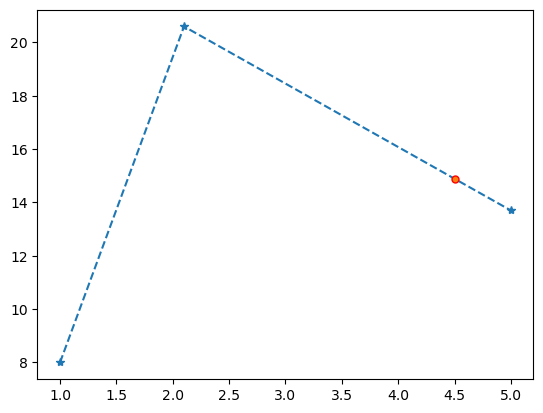

In [1]:
#Question 1 :
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter you number between 1.0 and 5.0:"))

if a>=1.0 and a <= 2.1:  #simple striaght lines 
    r = (18.5/7)*a + (8 - (18.5/7))
    print("y value",r)
    x = np.array([1.0,2.1,5.0])
    y = np.array([8.0, 20.6,13.7])
    plt.plot(x,y,'*--')
    plt.plot(a,z,marker='.',markersize=10,markeredgecolor='red')
elif a >= 2.1 and a <= 5.0:
    z = (-69/29)*a + (13.7 + (5*69)/29)
    x = np.array([1.0,2.1,5.0])
    y = np.array([8.0, 20.6,13.7])
    plt.plot(x,y,'*--')
    plt.plot(a,z,marker='.',markersize=10,markeredgecolor='red')
    print("y value", z)
else:
    print("invalid input")

Enter a number : 3


please enter data points


Enter x value :  1
Enter y value :  5
Enter x value :  7
Enter y value :  3
Enter x value :  9
Enter y value :  6
enter x value for which you want the y :  3.4


Value of f(k) is : 2.2199999999999993


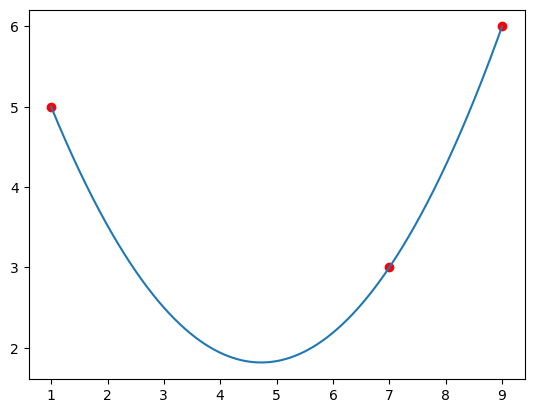

In [24]:
#Question #3 : Write a program that implements n-points Lagrange interpolation. Treat n as an input parameter.

import numpy as np
import matplotlib.pyplot as plt

n = int(input("Enter a number :"))
print("please enter data points")


class Data:                         #need to understand what this particular syntax does.
    def __init__(self, x, y):
        self.x = x
        self.y = y

def interpolate(f: list, xi: int, n) -> float:  #lagrange interpolation 

    result = 0.0
    for i in range(n):

        term = f[i].y
        for j in range(n):
            if j != i:
                term = term * (xi - f[j].x) / (f[i].x - f[j].x)

        result += term

    return result
f=[]
emlist=[]
emlist2 = []
i = 1
for i in range(i,n+1):
    q = int(input("Enter x value : "))
    emlist.append(q)
    p = int(input("Enter y value : "))
    emlist2.append(p)
    f.append(Data(q,p))
    i = i + 1


k = float(input("enter x value for which you want the y : "))
print("Value of f(k) is :", interpolate(f, k, n))

xdata = np.arange(min(emlist),max(emlist),0.001)
ydata = interpolate(f, xdata, n)
plt.figure()
plt.plot(xdata,ydata)
plt.scatter(emlist,emlist2,color='r')
plt.show()

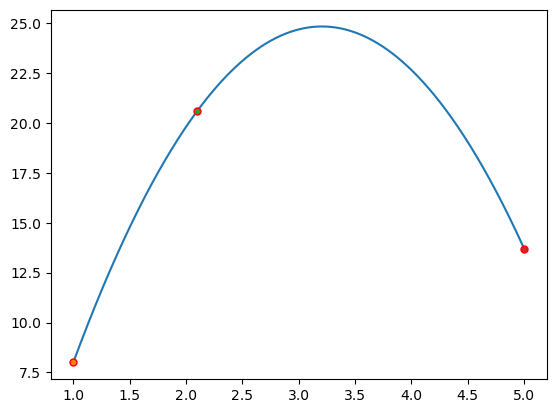

In [28]:
#Question 4

import numpy as np
import matplotlib.pyplot as pl
poly_deg = 2
x = np.array([1.0,2.1,5.0])
y = np.array([8.0, 20.6,13.7])
fit = np.polyfit(x, y, poly_deg) #it makes a polynomial of degree poly_deg which satisfies the given x and y points. 

n = np.linspace(1.0,5.0,6000)

interpol2 = np.polyval(fit, n) #polyval takes 2 inputs -> first is the interpolated function, and the second is the list which we input in the function4
                                # to get interpolated values. so interpol2 is a list. 

plt.plot(n,interpol2)
plt.plot(1.0,8.0,marker='.',markersize=10,markeredgecolor='red')
plt.plot(2.1,20.6,marker='.',markersize=10,markeredgecolor='red')
plt.plot(5.0,13.7,marker='.',markersize=10,markeredgecolor='red')
plt.show()

Enter order of polynomial:  5


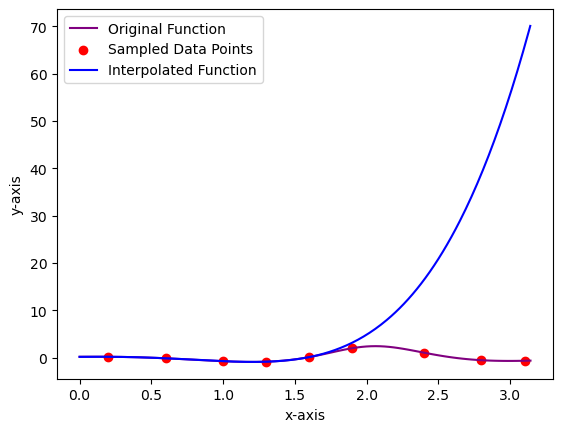

In [18]:
#Question 5 : Lagrange interpolation

import numpy as np
import matplotlib.pyplot as plt

class Data:
    def __init__(self, x, y):
        self.x = x
        self.y = y

xaxis = np.linspace(0, np.pi, 100)
yaxis = np.cos(3 * xaxis) / (0.4 + (xaxis - 2) ** 2)

plt.plot(xaxis, yaxis, color='purple', label="Original Function")

xaxis1 = np.array([0.2, 0.6, 1.0, 1.3, 1.6, 1.9, 2.4, 2.8, 3.1])
yaxis1 = np.array([0.22, -0.096, -0.707, -0.815, 0.156, 2.035, 1.086, -0.499, -0.616])

n1 = int(input("Enter order of polynomial: "))

def interpolate(f: list, xi: float, n1: int) -> float:
    result = 0.0
    for i in range(n1):
        term = f[i].y
        for j in range(n1):
            if j != i:
                term = term * (xi - f[j].x) / (f[i].x - f[j].x)
        result += term
    return result

z = [Data(x, y) for x, y in zip(xaxis1, yaxis1)]

x1 = np.arange(0, np.pi, 0.01)
y1 = [interpolate(z, xi, n1) for xi in x1]

plt.scatter(xaxis1, yaxis1, color='red', label="Sampled Data Points")

plt.plot(x1, y1, color='blue', label="Interpolated Function")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

Enter the number of data points:  2


Enter the data points (x, y) one by one:


Enter x[1]:  1
Enter y[1]:  12
Enter x[2]:  4
Enter y[2]:  6
Enter a value for x in the range [1.0, 4.0]:  3


Cubic spline interpolated value of y at x = 3.0 is: 8.0
Linear interpolated value of y at x = 3.0 is: 8.0


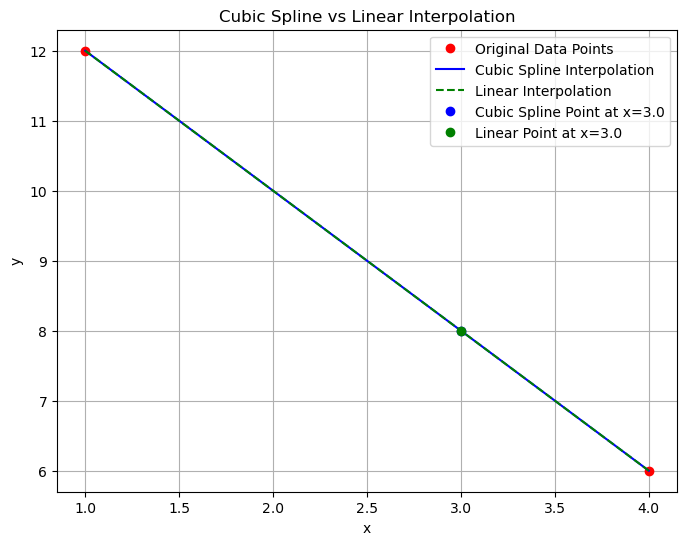

In [16]:
#Question 6

import numpy as np
from scipy.interpolate import CubicSpline, interp1d
import matplotlib.pyplot as plt

def get_user_input():
    n = int(input("Enter the number of data points: "))
    x_data = []
    y_data = []
    
    print("Enter the data points (x, y) one by one:")
    for i in range(n):
        x = float(input(f"Enter x[{i + 1}]: "))
        y = float(input(f"Enter y[{i + 1}]: "))
        x_data.append(x)
        y_data.append(y)
    
    return np.array(x_data), np.array(y_data)

def interpolate(x, x_data, cubic_spline, linear_interp):
    if x < x_data[0] or x > x_data[-1]:
        print(f"x = {x} is outside the interpolation range [{x_data[0]}, {x_data[-1]}]. Exiting.")
        return None, None
    y_cubic = cubic_spline(x)
    y_linear = linear_interp(x)
    return y_cubic, y_linear

x_data, y_data = get_user_input()

cubic_spline = CubicSpline(x_data, y_data)
linear_interp = interp1d(x_data, y_data)

x_input = float(input(f"Enter a value for x in the range [{x_data[0]}, {x_data[-1]}]: "))
y_cubic_output, y_linear_output = interpolate(x_input, x_data, cubic_spline, linear_interp)

if y_cubic_output is not None and y_linear_output is not None:
    print(f"Cubic spline interpolated value of y at x = {x_input} is: {y_cubic_output}")
    print(f"Linear interpolated value of y at x = {x_input} is: {y_linear_output}")
x_range = np.linspace(x_data[0], x_data[-1], 100)
y_cubic_range = cubic_spline(x_range)
y_linear_range = linear_interp(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label="Original Data Points")
plt.plot(x_range, y_cubic_range, 'b-', label="Cubic Spline Interpolation")
plt.plot(x_range, y_linear_range, 'g--', label="Linear Interpolation")
plt.plot(x_input, y_cubic_output, 'bo', label=f"Cubic Spline Point at x={x_input}")
plt.plot(x_input, y_linear_output, 'go', label=f"Linear Point at x={x_input}")

plt.title("Cubic Spline vs Linear Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

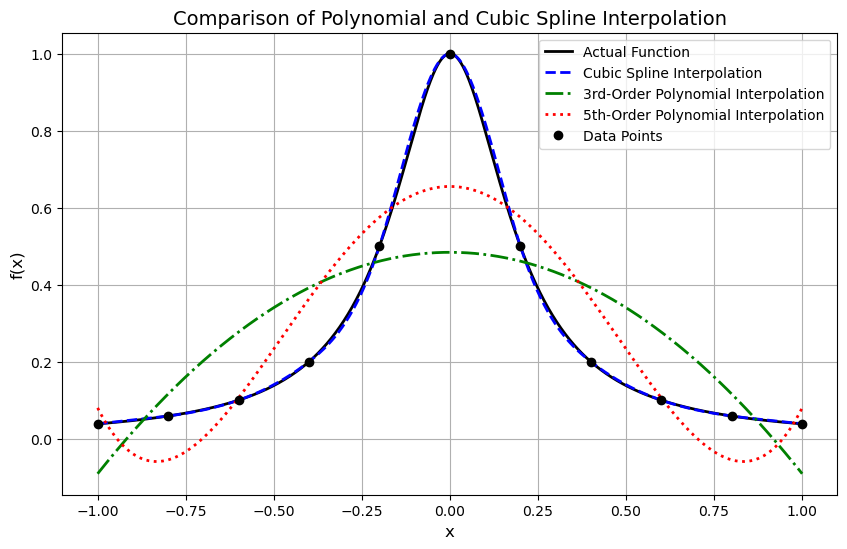

In [1]:
#Question 7 

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def f(x):
    return 1 / (1 + 25 * x**2)

x_data = np.linspace(-1.0, 1.0, 11)
y_data = f(x_data)

poly_3rd_order = np.polyfit(x_data, y_data, 3)  
y_poly_3rd = np.polyval(poly_3rd_order, x_data)

poly_5th_order = np.polyfit(x_data, y_data, 5)  
y_poly_5th = np.polyval(poly_5th_order, x_data)

cubic_spline = CubicSpline(x_data, y_data)

x_fine = np.linspace(-1.0, 1.0, 1000)
y_actual = f(x_fine)
y_cubic_spline = cubic_spline(x_fine)
y_poly_3rd_fine = np.polyval(poly_3rd_order, x_fine)
y_poly_5th_fine = np.polyval(poly_5th_order, x_fine)

plt.figure(figsize=(10, 6))
plt.plot(x_fine, y_actual, 'k-', label='Actual Function', linewidth=2)
plt.plot(x_fine, y_cubic_spline, 'b--', label='Cubic Spline Interpolation', linewidth=2)
plt.plot(x_fine, y_poly_3rd_fine, 'g-.', label='3rd-Order Polynomial Interpolation', linewidth=2)
plt.plot(x_fine, y_poly_5th_fine, 'r:', label='5th-Order Polynomial Interpolation', linewidth=2)

plt.plot(x_data, y_data, 'ko', label='Data Points')

plt.title("Comparison of Polynomial and Cubic Spline Interpolation", fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


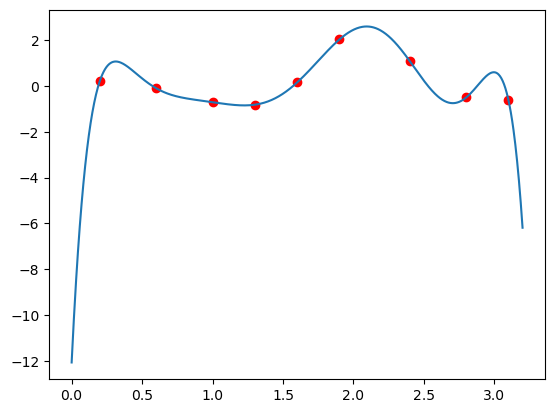

In [42]:
#lagrange interpolation 
import numpy as np
import matplotlib.pyplot as plt

xdata = np.array([0.2, 0.6, 1.0, 1.3, 1.6, 1.9, 2.4, 2.8, 3.1])
ydata = np.array([0.22, -0.096, -0.707, -0.815, 0.156, 2.035, 1.086, -0.499, -0.616])

def lagrange(a,x,y):
    result = 0.0
    n = len(x) #number of points used (degree of polynomial)
    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i :
                
                term = term*((a - x[j])/(x[i] - x[j]))

        result = result + term

    return result 

x_data = np.linspace(0,3.2,1000) #ye array xmin se xmax tak bana
y_data = lagrange(x_data,xdata,ydata)

plt.figure()
plt.scatter(xdata,ydata,color='red')
plt.plot(x_data,y_data)
plt.show()

#pointers for exam --> label and mark everything, all the plots
#as much as possible, write a general code, but don't waste too much time on it. 

enter degree of polynomial 5


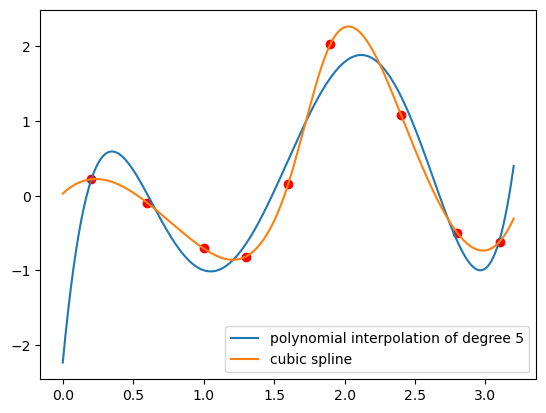

In [62]:
#polyval and polyfit :
#cubic spline


import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

xdata = np.array([0.2, 0.6, 1.0, 1.3, 1.6, 1.9, 2.4, 2.8, 3.1])
ydata = np.array([0.22, -0.096, -0.707, -0.815, 0.156, 2.035, 1.086, -0.499, -0.616])

deg = int(input('enter degree of polynomial'))
fit = np.polyfit(xdata,ydata,deg)

n = np.linspace(0,3.2,1000)
interpol = np.polyval(fit,n)

cubic_spline = CubicSpline(xdata,ydata)

y_cs = cubic_spline(n)

plt.figure()
plt.scatter(xdata,ydata,color='r')
plt.plot(n,interpol,label=f'polynomial interpolation of degree {deg}')
plt.plot(n,y_cs,label='cubic spline')
plt.legend()
plt.show()